##### Clustering

- 대표적인 비지도학습 알고리즘
- 레이블이 없는 데이터를 그룹화 하는 알고리즘

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

C:\Users\jjong\AppData\Local\Temp\ipykernel_15408\3944844025.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
# Data Generation

def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1])

In [3]:
np.random.seed(0)
n_samples = 1500
random_state = 42
noise = 0.05

In [6]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)

moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

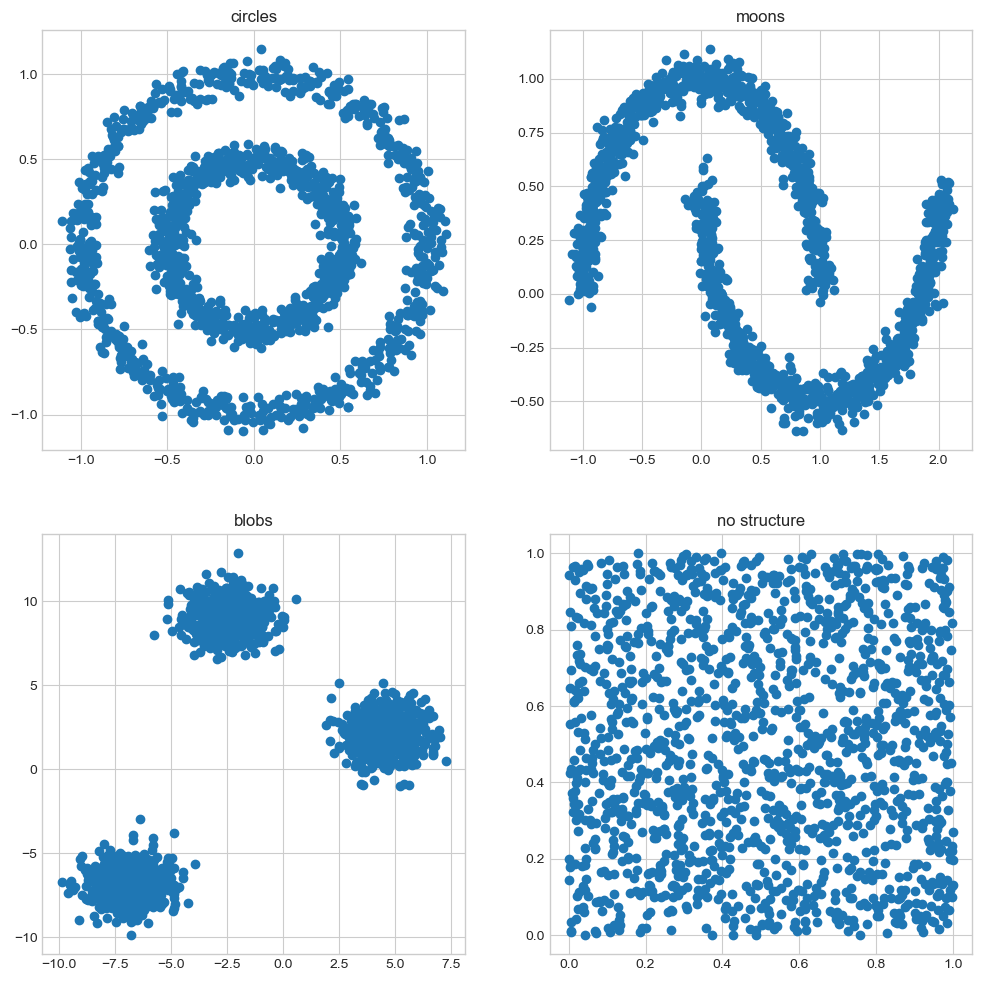

In [7]:
plt.figure(figsize=(12,12))
plot_data(circles, 221, 'circles')
plot_data(moons, 222, 'moons')
plot_data(blobs, 223, 'blobs')
plot_data(no_structures, 224, 'no structure')

In [28]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int64)
    else:
        labels = model.predict(X)

    colors = np.array(['#30A9DE', '#E53A40','#090707','#A593E0','#F6B352','#519D9E','#D81159','#8CD790','#353866'])
    ax= plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

##### **<span style="color:pink"> K-평균 (K-Means) </span>**

- n개의 등분산 그룹으로 군집화

- 제곱합 함수를 최소화

- 군집화 개수를 지정해야함.

- 각 군집 $C$ 의 평균 $\mu_i$ 을 중심점 이라고 함
- 다음을 만족하는 중심점을 찾는것이 목표

<div align="center">

$\displaystyle \sum_{i=0}^n \min_{\mu_j \in C} \left(\|x_i - \mu_j\|^2 \right)$

</div>

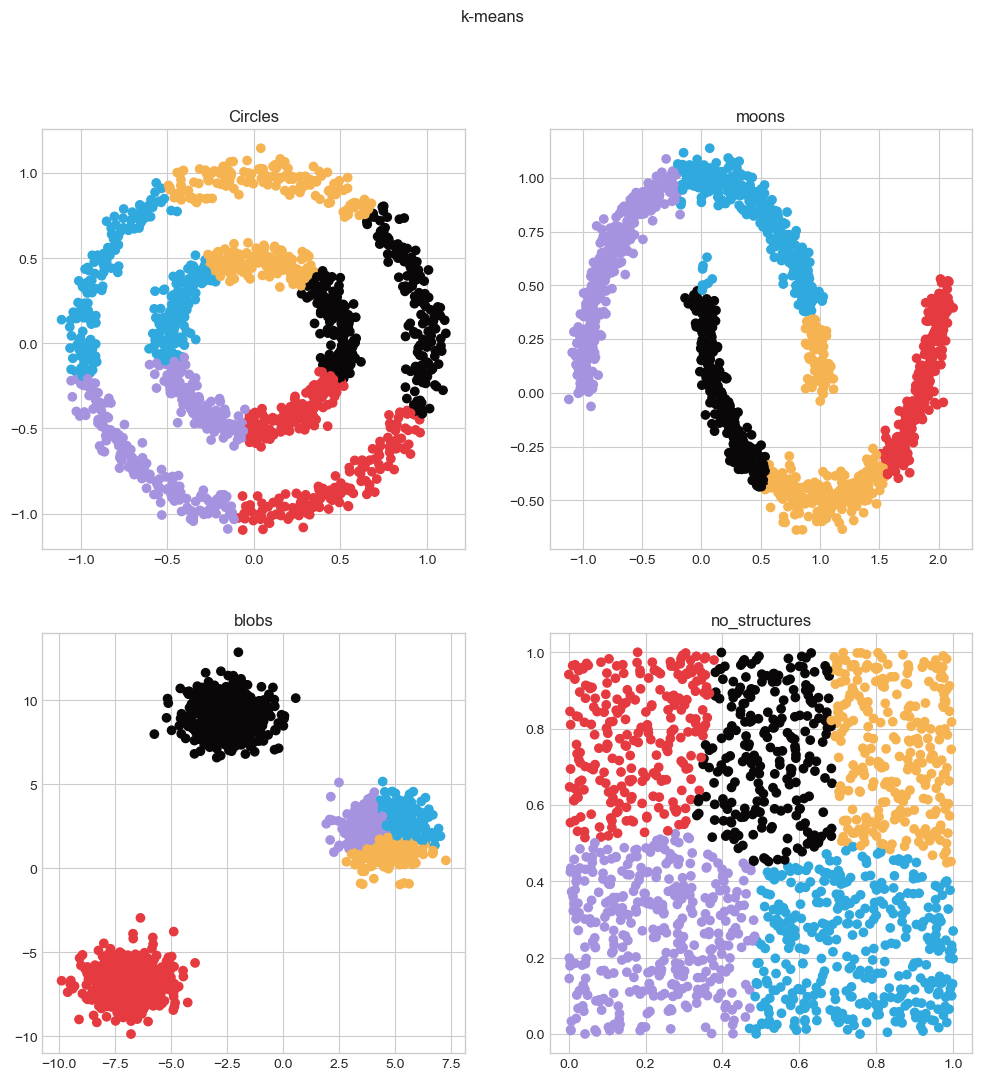

In [10]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-means')

fit_predict_plot(cluster.KMeans(n_clusters=5, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=5, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.KMeans(n_clusters=5, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=5, random_state=random_state), no_structures, 224, 'no_structures')

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
idx = np.where(predict==0)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
idx = np.where(predict==2)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

##### 미니 배치 K-Means

- 배치 처리를 통해 계산 시간을 줄인 K-Means
- K-Means와 다른 결과가 나올 수 있음

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_T

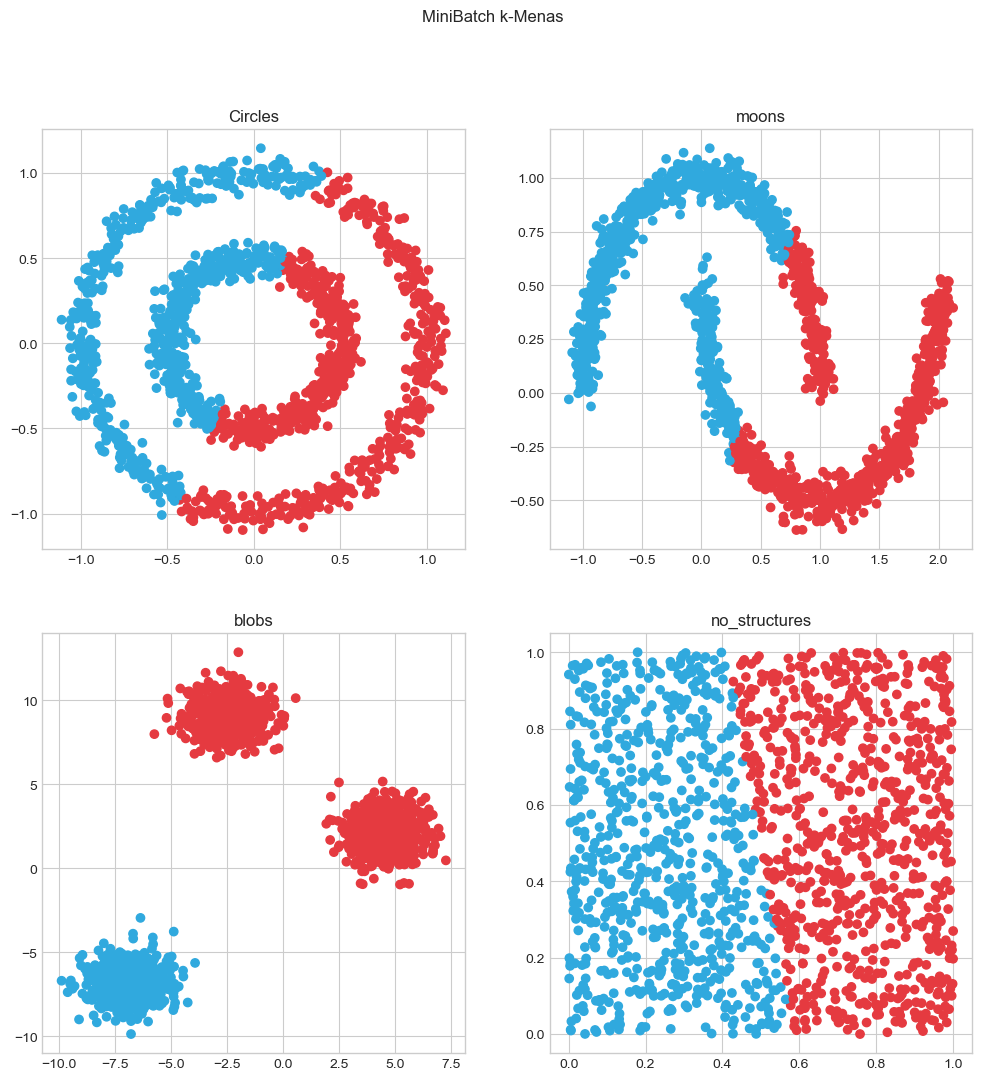

In [18]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Menas')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'no_structures')

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_T

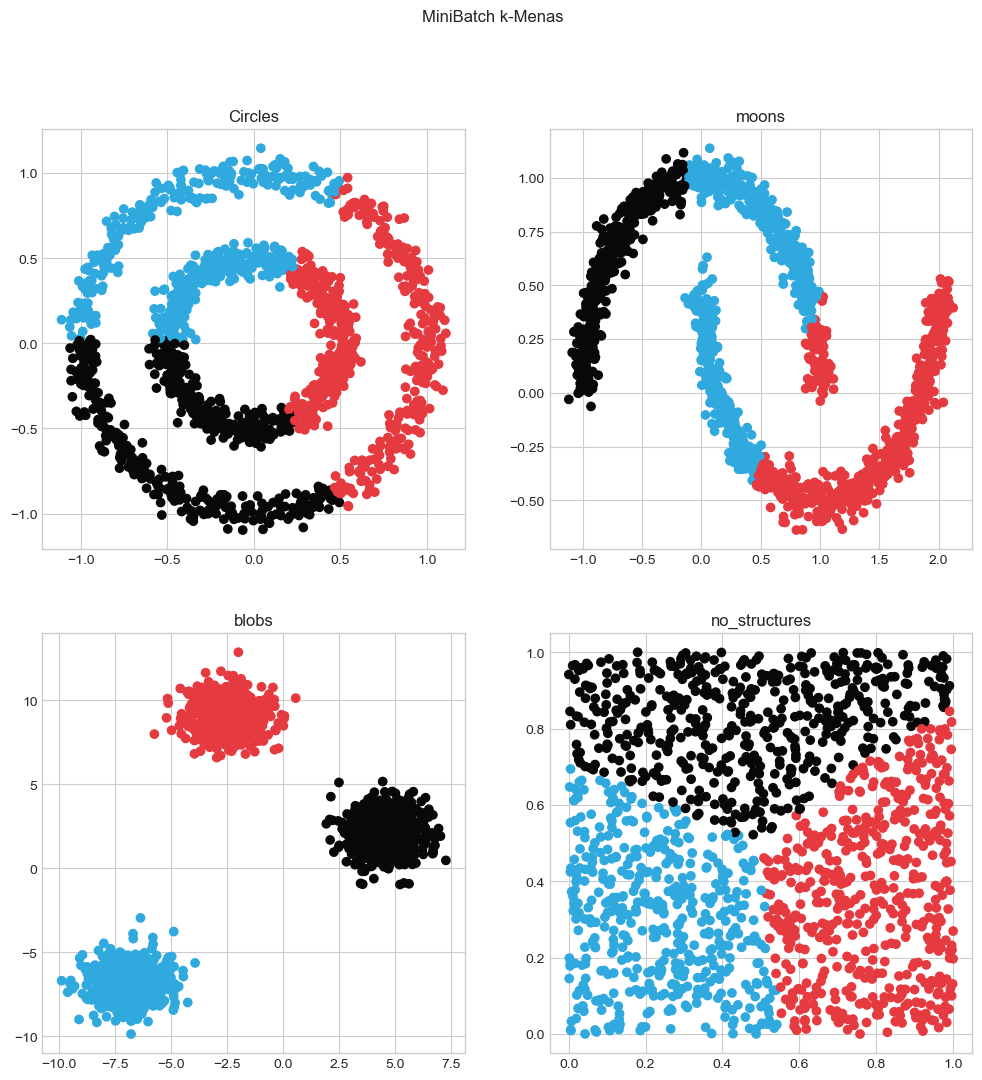

In [19]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Menas')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'no_structures')

##### **<span style="color:pink"> Affinity Propagation </span>**

- 샘플 쌍 끼리 메시지를 보내 군집을 생성
- 샘플을 대표하는 적절한 예를 찾을 때까지 반복
- 군집의 갯수를 자동으로 정함

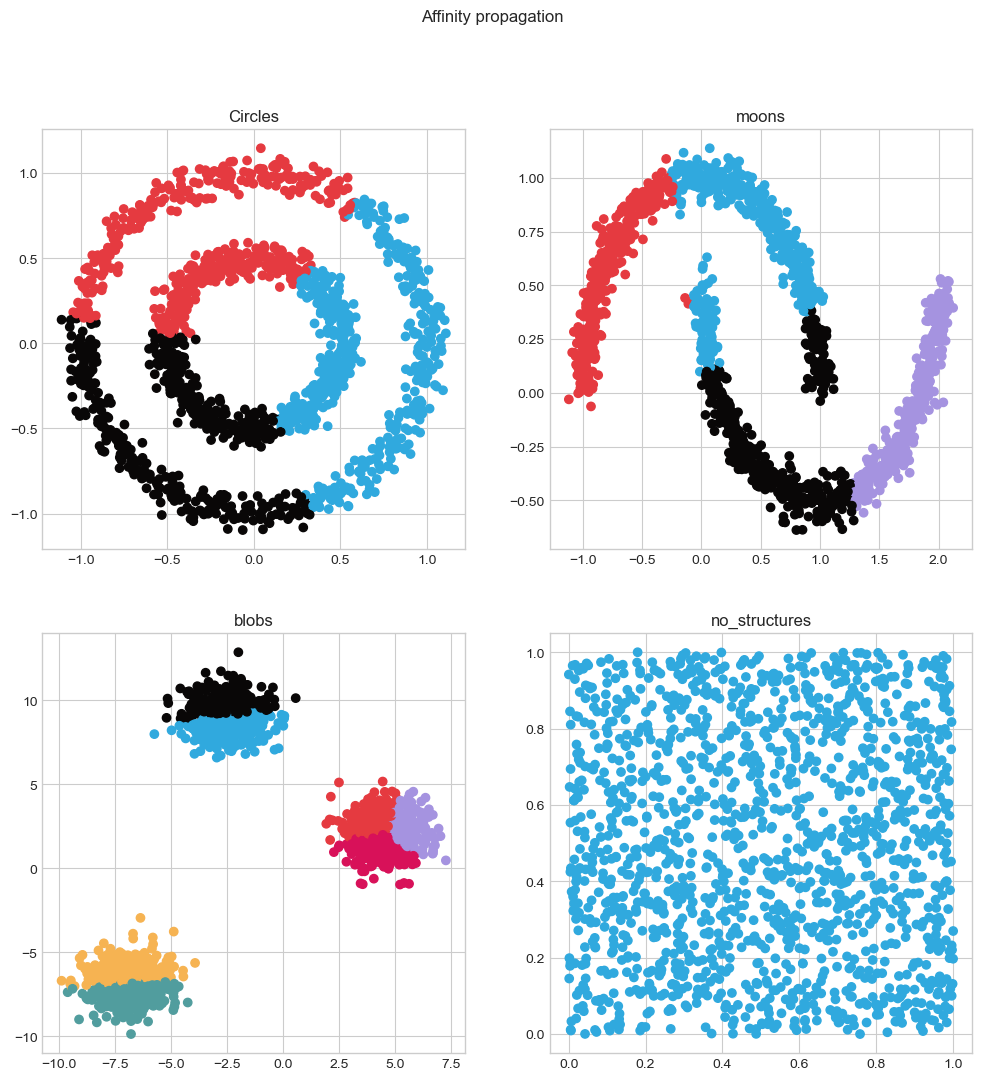

In [20]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), moons, 222, 'moons')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), blobs, 223, 'blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), no_structures, 224, 'no_structures')

##### Mean Shift

- 중심점 후보를 정해진 구역 내 평균으로 업데이트

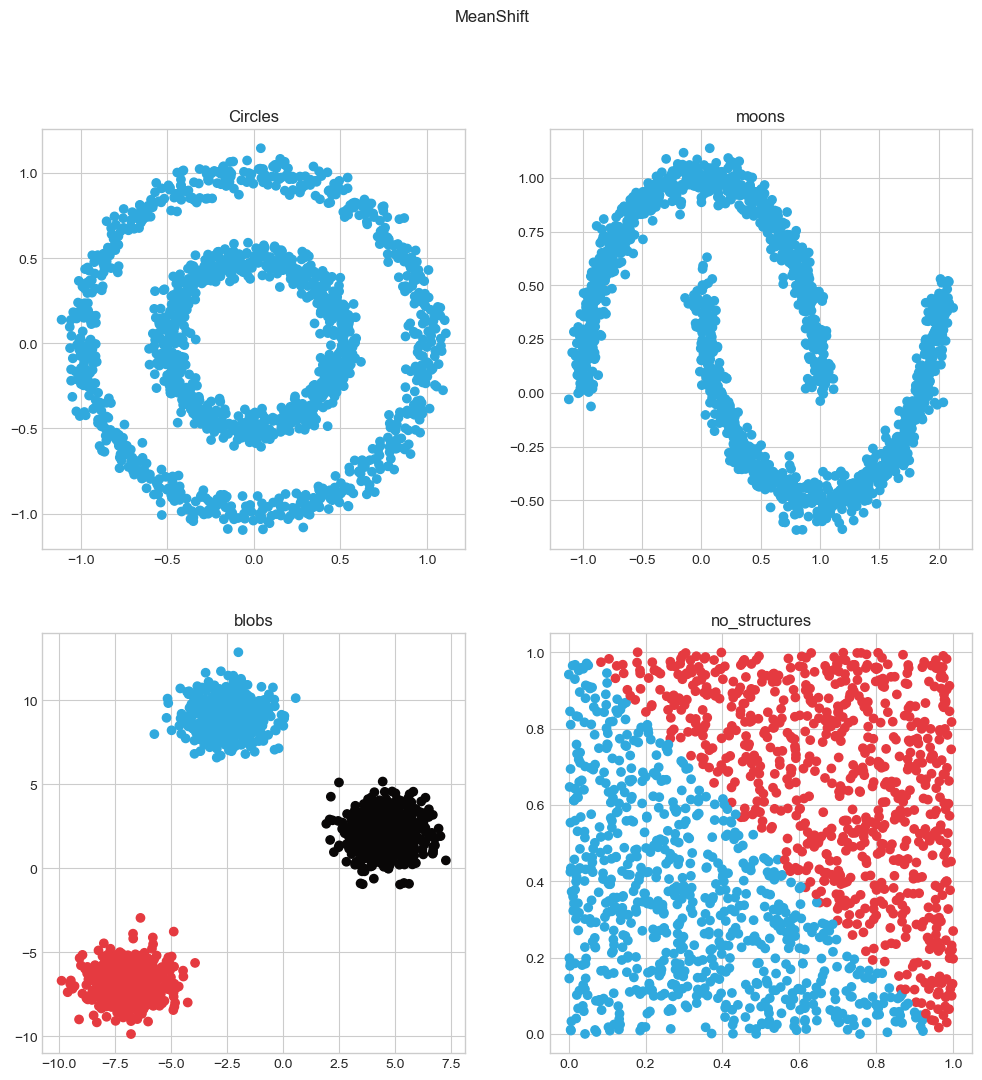

In [21]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MeanShift')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'no_structures')

##### 스펙트럼 군집화 (Spectral Clustering)

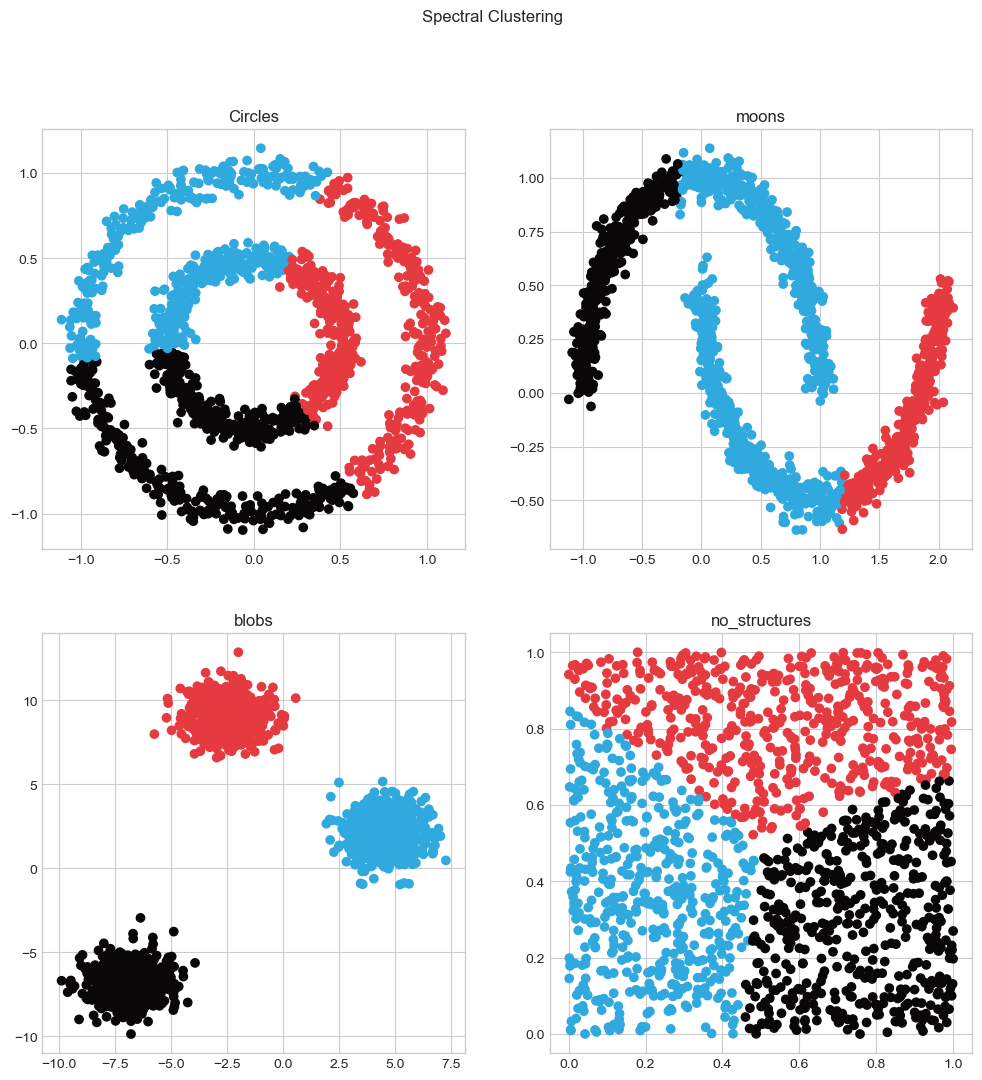

In [30]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), no_structures, 224, 'no_structures')

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()

In [34]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [35]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [36]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

##### **<span style="color:pink"> 계층 군집화 Hierarchical Clustering </span>**


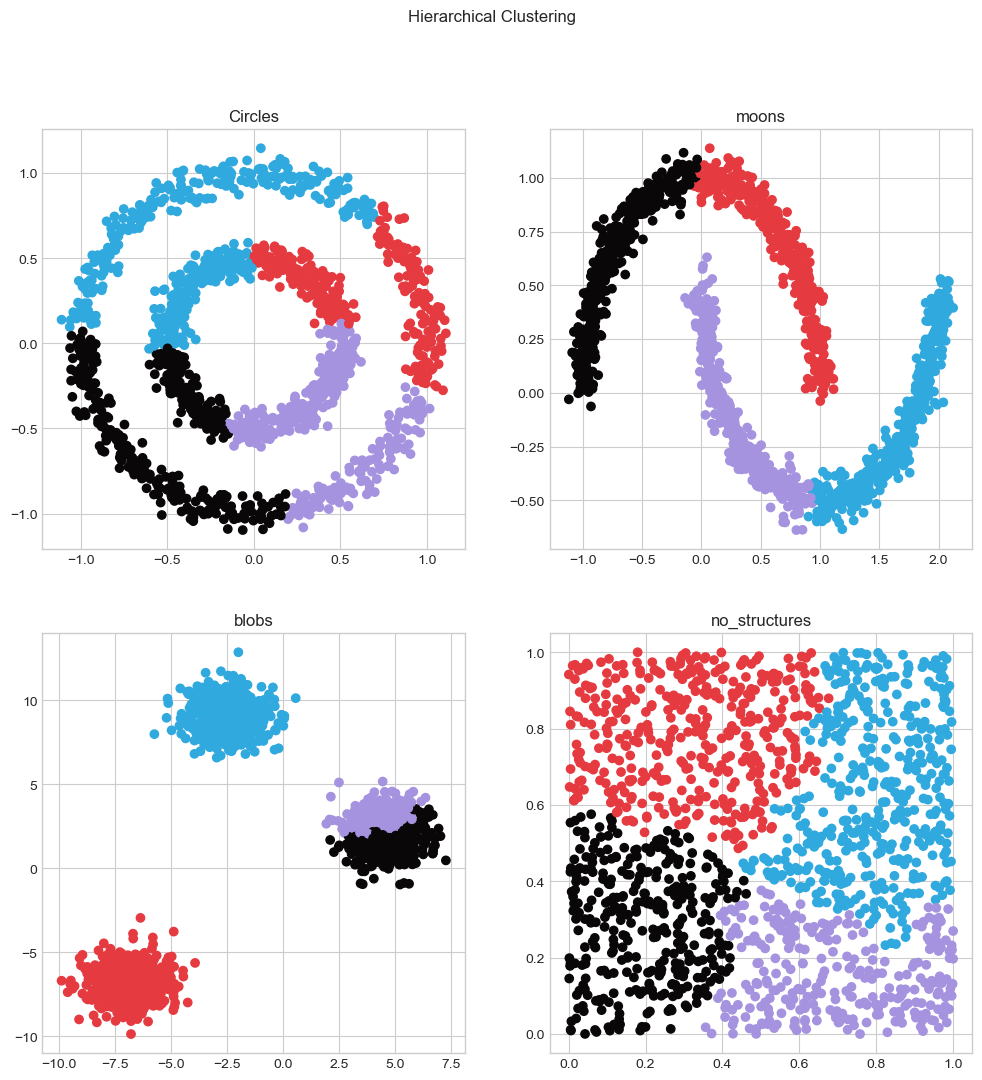

In [39]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), moons, 222, 'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), blobs, 223, 'blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), no_structures, 224, 'no_structures')

In [40]:
# Wine Data Clustering

from sklearn.datasets import load_wine

In [41]:
wine = load_wine()

In [42]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict= model.labels_

In [44]:
idx = np.where(predict ==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

##### **<span style="color:pink">DBSCAN (Density-Based Spatial Clustering of Application with Noise)</span>**

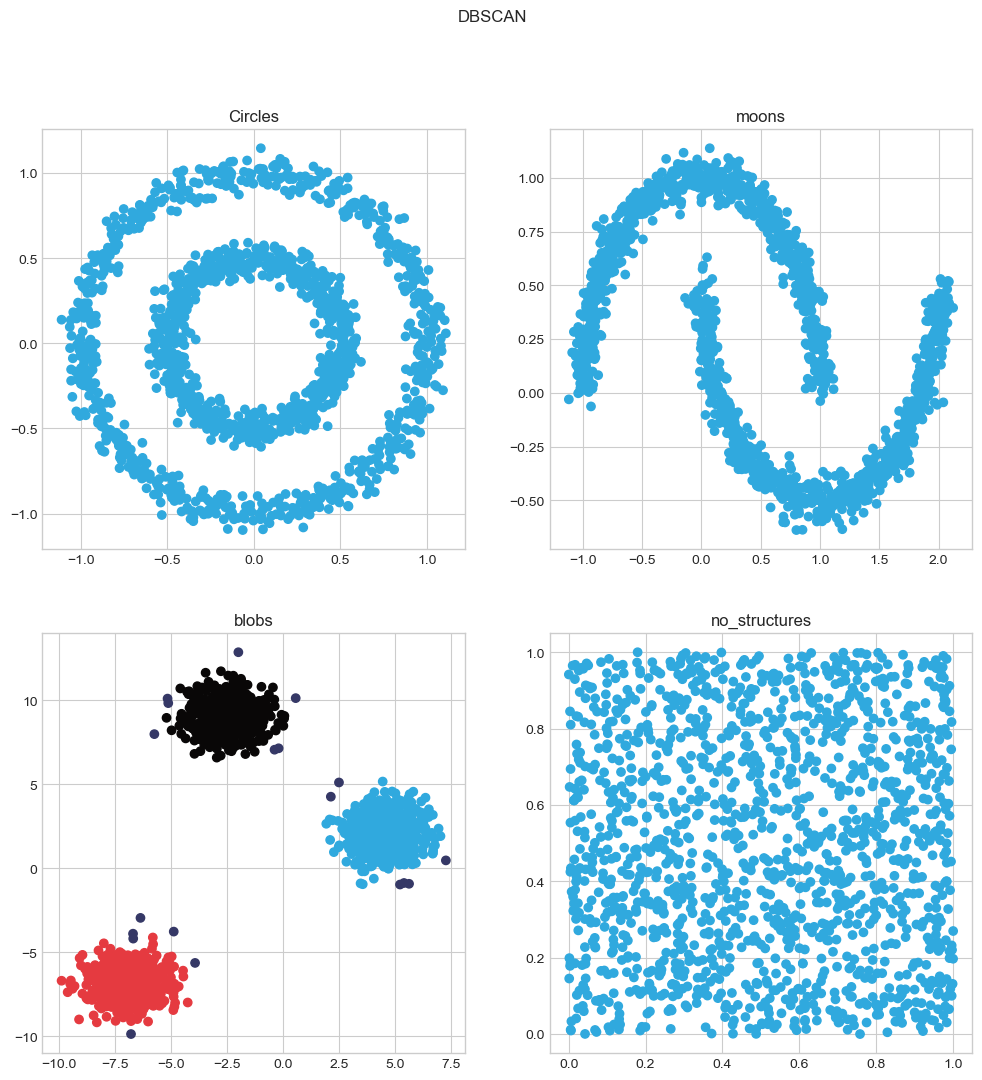

In [48]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=0.7), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=0.7), moons, 222, 'moons')
fit_predict_plot(cluster.DBSCAN(eps=0.7), blobs, 223, 'blobs')
fit_predict_plot(cluster.DBSCAN(eps=0.7), no_structures, 224, 'no_structures')